## Week 12 and 13 Assignment - DATASCI200 Introduction to Data Science Programming, UC Berkeley MIDS

Write code in this Jupyter Notebook to solve the following problems. Please upload this **Notebook** with your solutions to your GitHub repository and provide a link in the last question in gradescope. 

Assignment due date: 11:59PM PT the night before the Week 13 Live Session. Do **NOT** push/upload the data fil

## Objectives

- Explore and glean insights from a real dataset using pandas
- Practice using pandas for exploratory analysis, information gathering, and discovery
- Practice using matplotlib for data visualization

## General Guidelines:

- This is a **real** dataset and so it may contain errors and other pecularities to work through
- This dataset is ~218mb, which will take some time to load (and probably won't load in Google Sheets or Excel)
- If you make assumptions, annotate them in your responses
- While there is one code/markdown cell positioned after each question as a placeholder, some of your code/responses may require multiple cells
- Double-click the markdown cells that say for example **1a answer here:** to enter your written answers. If you need more cells for your written answers, make them markdown cells (rather than code cells)
- This homework assignment is not autograded because of the variety of responses one could give. 
  - Please upload this notebook to the autograder page and the TAs will manually grade it. 
  - Ensure that each cell is run and outputs your answer for ease of grading! 
  - Highly suggest to do a `restart & run all` before uploading your code to ensure everything runs and outputs correctly.
  - Answers without code (or code that runs) will be given 0 points.
- **This is meant to simulate real world data so you will have to do some external research to determine what some of the answers are!** 
- Only use the plotting libraries matplotlib or seaborn for the visualizations.

## Dataset

You are to analyze campaign contributions to the 2016 U.S. presidential primary races made in California. Use the csv file located here: https://drive.google.com/file/d/1ftdw7L9Z6WQJ6i0SXj030PA7ObsXfPsg/view?usp=sharing. You should download and save this file in a folder outside where this notebook is stored. This file originally came from the U.S. Federal Election Commission (https://www.fec.gov/).

This file is already cleaned and ready to use - you **do not** need to filter or clean it anymore! (you may not agree with the how it was cleaned but please use this file as is).

**DO NOT PUSH THIS FILE TO YOUR GITHUB REPO!**

- Best practice is to not have DATA files in your code repo. As shown below, the default load is outside of the folder this notebook is in. If you change the folder where the file is stored please update the first cell!
- If you do accidentally push the file to your github repo - follow the directions here to fix it: https://docs.google.com/document/d/15Irgb5V5G7pKPWgAerH7FPMpKeQRunbNflaW-hR2hTA/edit?usp=sharing

Documentation for this data can be found here: https://drive.google.com/file/d/11o_SByceenv0NgNMstM-dxC1jL7I9fHL/view?usp=sharing

## Setup

Run the cell below as it will load the data into a pandas dataframe named `contrib`. Note that a custom date parser is defined to speed up loading. If Python were to guess the date format, it would take even longer to load.

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

# Load the data
# We have this defaulted to the folder OUTSIDE of your repo - please change it as needed
contrib = pd.read_csv('2016_ca_primary_cleaned.csv', index_col=False, parse_dates=['contb_receipt_dt'])
print(contrib)

# Note - for now, it is okay to ignore the warning about mixed types.

/var/folders/6q/dd_6hhkd2nd4q1pyp1nh1d140000gn/T/ipykernel_85108/1994898843.py:13: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  contrib = pd.read_csv('2016_ca_primary_cleaned.csv', index_col=False, parse_dates=['contb_receipt_dt'])


          cmte_id    cand_id                  cand_nm               contbr_nm  \
0       C00575795  P00003392  Clinton, Hillary Rodham              AULL, ANNE   
1       C00575795  P00003392  Clinton, Hillary Rodham       CARROLL, MARYJEAN   
2       C00575795  P00003392  Clinton, Hillary Rodham        GANDARA, DESIREE   
3       C00577130  P60007168         Sanders, Bernard               LEE, ALAN   
4       C00577130  P60007168         Sanders, Bernard        LEONELLI, ODETTE   
...           ...        ...                      ...                     ...   
668859  C00573519  P60005915      Carson, Benjamin S.  HENDERSON, YVONNE MRS.   
668860  C00573519  P60005915      Carson, Benjamin S.   HENDRICKS, JIM C. MR.   
668861  C00573519  P60005915      Carson, Benjamin S.   HENDRICKS, JIM C. MR.   
668862  C00573519  P60005915      Carson, Benjamin S.   HENDRICKS, JIM C. MR.   
668863  C00573519  P60005915      Carson, Benjamin S.   HENDRICKS, JIM C. MR.   

          contbr_city contb

## 1. Plotting Data (30 points)

Your boss asked for you to make a few charts from the dataset to better explore the information. 

**1a.** Plotting a histogram of contribute amount (10 points)

Make a histogram of the **full range** of values in the `contb_receipt_amt` variable. 

Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values

Based on the histogram - what range of contributions have the highest count frequency?

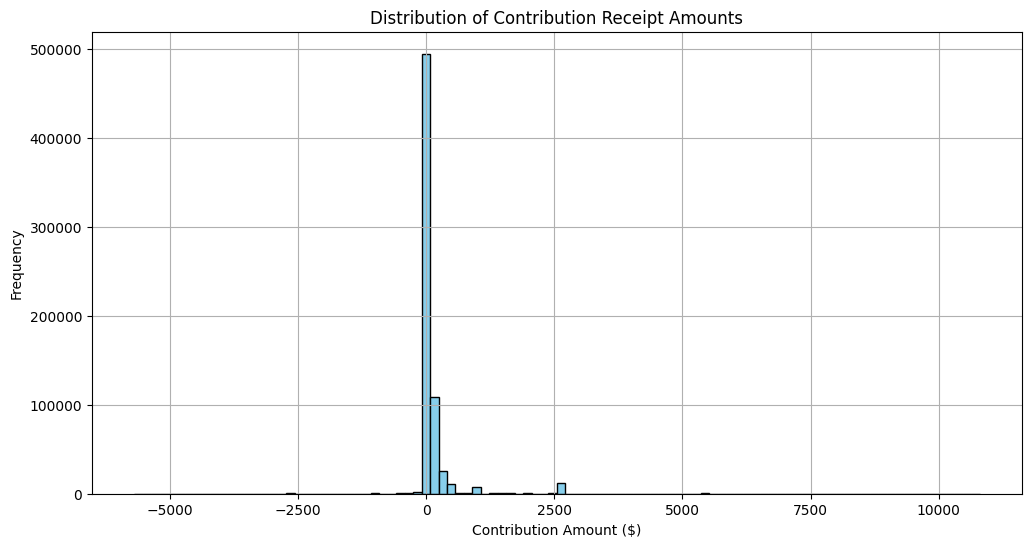

In [11]:
# 1a YOUR CODE HERE
df = contrib[contrib['contb_receipt_amt'].notnull()]

# Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(df['contb_receipt_amt'], bins=100, edgecolor='black', color='skyblue')
plt.title('Distribution of Contribution Receipt Amounts')
plt.xlabel('Contribution Amount ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


- **1a answer here:** 

**1b.** Plotting a histogram of contribute amount (10 points)

Make a 'zoomed-in' histogram of the range that had the highest count frequencies from 1a above. 

Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values

What are some insights that you can see from these two histograms (1a and 1b)?

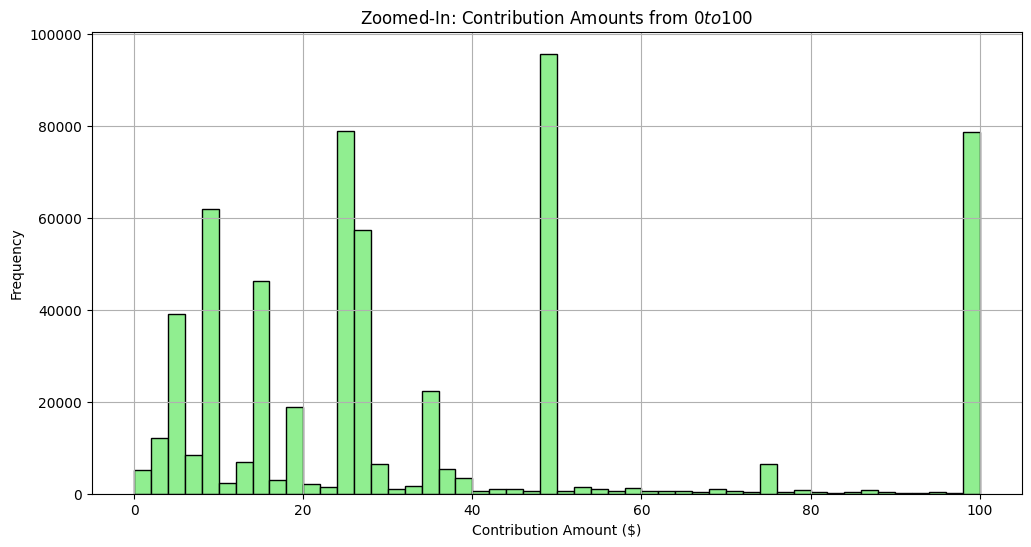

In [15]:
# 1b YOUR CODE HERE
zoom_range = df.loc[(df['contb_receipt_amt'] > 0) & (df['contb_receipt_amt'] <= 100), 'contb_receipt_amt']

plt.figure(figsize=(12, 6))
plt.hist(zoom_range, bins=50, edgecolor='black', color='lightgreen')
plt.title('Zoomed-In: Contribution Amounts from $0 to $100')
plt.xlabel('Contribution Amount ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

- **1b answer here:** 

**1c.** Present a time-series line chart with the following elements (10 points)  

- The chart needs to have two lines - one for Bernie Sanders and one for Hillary Clinton.
- Show the date on the x-axis
- Add vertical lines for these dates of the primary debates: 17 Jan 2016, 11 Feb 2016, 9 Mar 2016
- Show the total contribution amount for that day on the y-axis
- Include a title
- Include axis labels

How did the debates effect fundraising / donations? Did fundraising increase or decrease after the debates for each candidate?

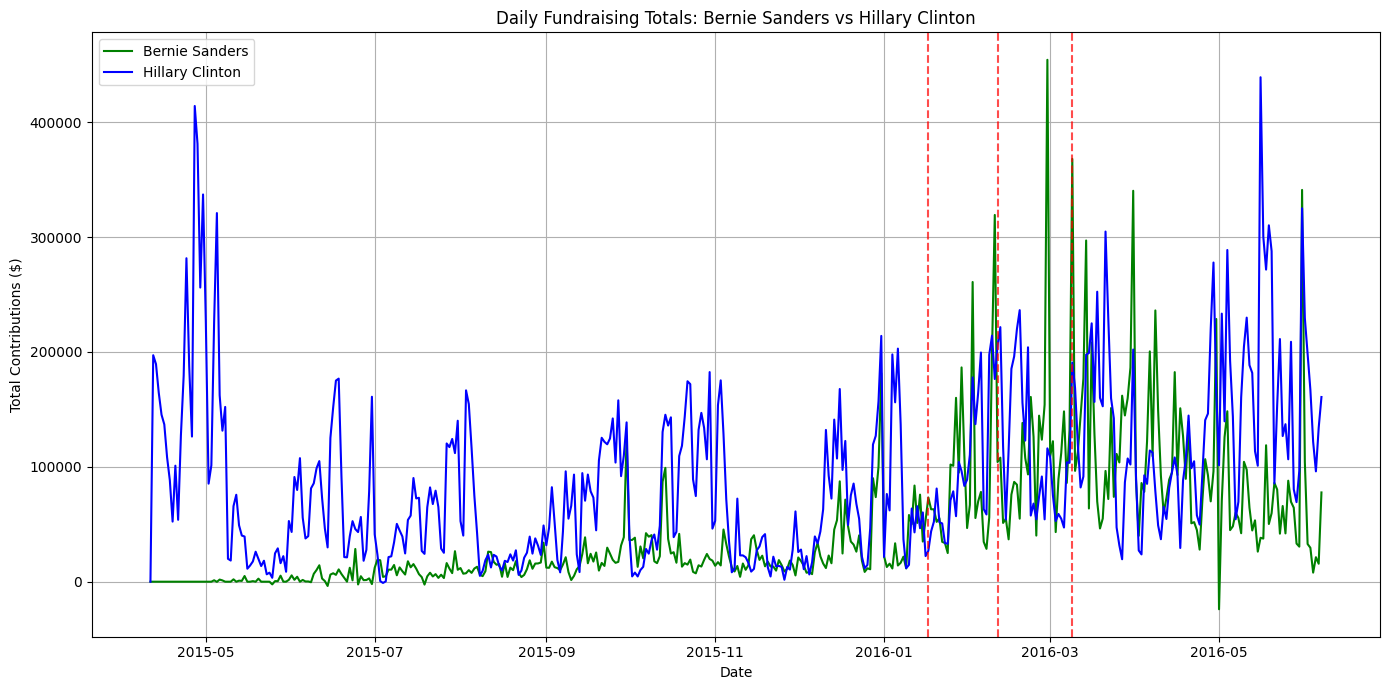

In [16]:
# 1c YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Convert date and filter for Bernie and Hillary
df['contb_receipt_dt'] = pd.to_datetime(df['contb_receipt_dt'], errors='coerce')
df = df[df['cand_nm'].isin(['Sanders, Bernard', 'Clinton, Hillary Rodham'])]

# --- Step 2: Group by date and candidate, sum daily contributions
daily_totals = df.groupby(['cand_nm', 'contb_receipt_dt'])['contb_receipt_amt'].sum().reset_index()

# --- Step 3: Pivot so each candidate is a separate column
pivot_df = daily_totals.pivot(index='contb_receipt_dt', columns='cand_nm', values='contb_receipt_amt').fillna(0)

# --- Step 4: Plot
plt.figure(figsize=(14, 7))
plt.plot(pivot_df.index, pivot_df['Sanders, Bernard'], label='Bernie Sanders', color='green')
plt.plot(pivot_df.index, pivot_df['Clinton, Hillary Rodham'], label='Hillary Clinton', color='blue')

# Add vertical lines for debate dates
debate_dates = ['2016-01-17', '2016-02-11', '2016-03-09']
for date in debate_dates:
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--', alpha=0.7)

# --- Step 5: Formatting
plt.title('Daily Fundraising Totals: Bernie Sanders vs Hillary Clinton')
plt.xlabel('Date')
plt.ylabel('Total Contributions ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



- **1c answer here:** 

## 2. Exploring Campaign Contributions (35 points)

Let's investigate the donations to the candidates. (5 points)

**2a.** Present a table that shows the number of donations to each candidate sorted by number of donations.**

- When presenting data as a table, it is often best to sort the data in a meaningful way. This makes it easier for your reader to examine what you've done and to glean insights.  From now on, all tables that you present in this assignment (and course) should be sorted.
- Hint: Use the `groupby` method. Groupby is explained in Unit 13: async 13.3 & 13.5
- Hint: Use the `sort_values` method to sort the data so that candidates with the largest number of donations appear on top.

Which candidate received the largest number/count of contributions (variable 'contb_receipt_amt')?

In [17]:
# 2a YOUR CODE HERE
# Group by candidate name and count the number of donations
donation_counts = df.groupby('cand_nm')['contb_receipt_amt'].count().reset_index()

# Rename columns for clarity
donation_counts.columns = ['Candidate', 'Number of Donations']

# Sort by number of donations in descending order
donation_counts = donation_counts.sort_values(by='Number of Donations', ascending=False)

# Display the table
donation_counts


,Candidate,Number of Donations
1,"Sanders, Bernard",379284
0,"Clinton, Hillary Rodham",171104


- **2a answer here:** 

**2b.** Now, present a table that shows the total value of donations to each candidate sorted by total value of the donations. (5 points)

Which candidate raised the most money in California?

In [19]:
# 2b YOUR CODE HERE
# Filter for California donations
ca_donations = df[df['contbr_st'] == 'CA']

# Group by candidate name and sum the donation amounts
ca_totals = ca_donations.groupby('cand_nm')['contb_receipt_amt'].sum().reset_index()

# Rename columns for clarity
ca_totals.columns = ['Candidate', 'Total Donations from CA']

# Sort by total donations descending
ca_totals = ca_totals.sort_values(by='Total Donations from CA', ascending=False)

top_ca_candidate = ca_totals.iloc[0]
print(f"{top_ca_candidate['Candidate']} raised the most money in California: ${top_ca_candidate['Total Donations from CA']:,.2f}")




Clinton, Hillary Rodham raised the most money in California: $38,969,122.68


- **2b answer here:** 

**2c.** Combine the tables (sorted by either a or b above). (5 points)

- Looking at the two tables you presented above - if those tables are Series convert them to DataFrames.
- Rename the variable (column) names to accurately describe what is presented.
- Merge together your tables to show the *count* and the *value* of donations to each candidate in one table.
- Hint: Use the `merge` method.

In [20]:
# 2c YOUR CODE HERE
# Step 1: Create donation count table
donation_counts = df.groupby('cand_nm')['contb_receipt_amt'].count().reset_index()
donation_counts.columns = ['Candidate', 'Number of Donations']

# Step 2: Create total donation value table
donation_totals = df.groupby('cand_nm')['contb_receipt_amt'].sum().reset_index()
donation_totals.columns = ['Candidate', 'Total Donation Amount']

# Step 3: Merge the two tables on 'Candidate'
merged_table = pd.merge(donation_counts, donation_totals, on='Candidate')

# Step 4: Sort by either number or total (your choice)
merged_table = merged_table.sort_values(by='Total Donation Amount', ascending=False)

# Display the merged table
merged_table



,Candidate,Number of Donations,Total Donation Amount
0,"Clinton, Hillary Rodham",171104,"38,969,122.68"
1,"Sanders, Bernard",379284,"19,062,998.80"


**2d. Calculate and add a new variable to the table from 2c that shows the average \$ per donation. Print this table sorted by the average donation** (5 points)

Which candidate had the highest average donation?

In [21]:
# 2d YOUR CODE HERE
# Step 1: Calculate average donation and add as a new column
merged_table['Average Donation ($)'] = merged_table['Total Donation Amount'] / merged_table['Number of Donations']

# Step 2: Sort the table by average donation in descending order
sorted_by_avg = merged_table.sort_values(by='Average Donation ($)', ascending=False)

top_avg = sorted_by_avg.iloc[0]
print(f"{top_avg['Candidate']} had the highest average donation: ${top_avg['Average Donation ($)']:.2f}")




Clinton, Hillary Rodham had the highest average donation: $227.75


- **2d answer here:** 

**2e. Plotting a Bar Chart** (10 points)

Make a single bar chart that shows two different bars per candidate with one bar as the total value of the donations and the other as average $ per donation. 
- Show the Candidates Name on the x-axis
- Show the amount on the y-axis
- Include a title
- Include axis labels
- Sort by total value of the donations
- Make the y-axis a log-scale to show both numbers! (matplotlib docs: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html )

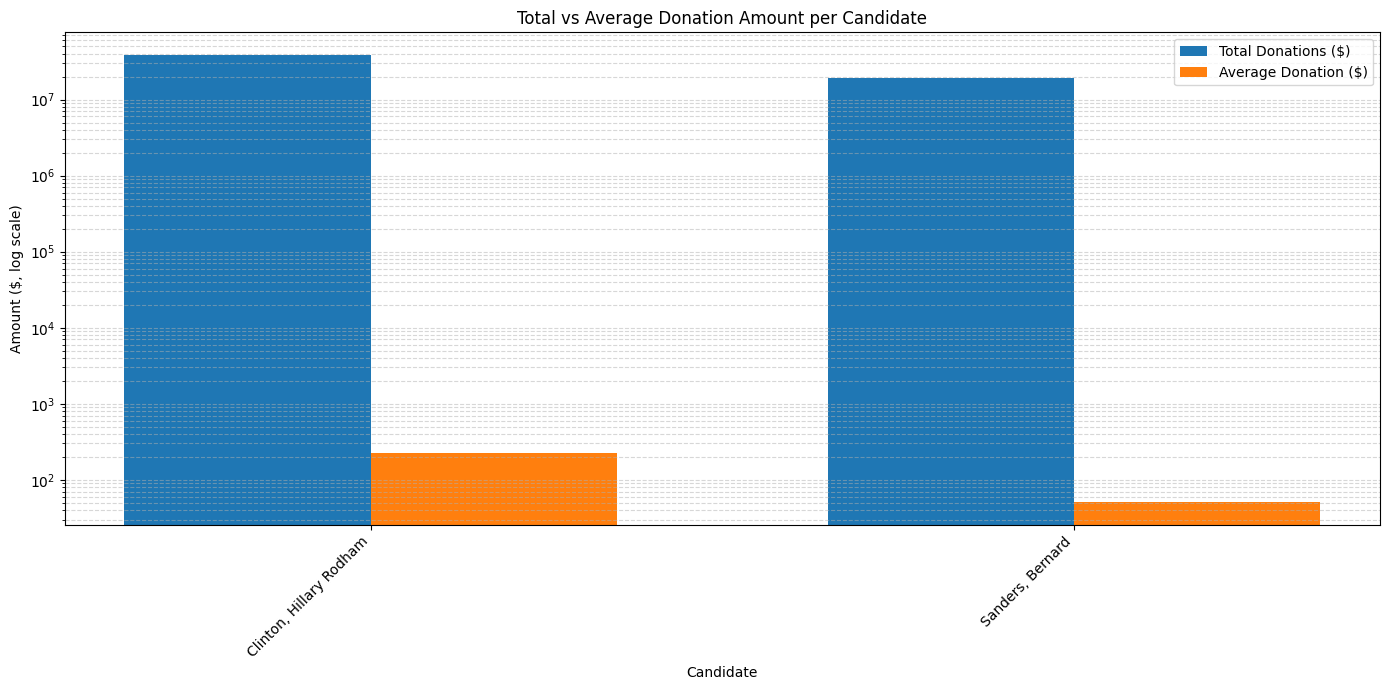

In [22]:
# 2e YOUR CODE HERE
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Calculate average donation if not already added
merged_table['Average Donation ($)'] = merged_table['Total Donation Amount'] / merged_table['Number of Donations']

# Step 2: Sort by total donation amount
merged_sorted = merged_table.sort_values(by='Total Donation Amount', ascending=False)

# Step 3: Plot
candidates = merged_sorted['Candidate']
x = np.arange(len(candidates))  # X locations for the groups
width = 0.35  # Width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(14, 7))

bar1 = ax.bar(x - width/2, merged_sorted['Total Donation Amount'], width, label='Total Donations ($)')
bar2 = ax.bar(x + width/2, merged_sorted['Average Donation ($)'], width, label='Average Donation ($)')

# Log scale for y-axis
ax.set_yscale('log')

# Add labels, title, and formatting
ax.set_xlabel('Candidate')
ax.set_ylabel('Amount ($, log scale)')
ax.set_title('Total vs Average Donation Amount per Candidate')
ax.set_xticks(x)
ax.set_xticklabels(candidates, rotation=45, ha='right')
ax.legend()
ax.grid(True, which='both', axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()



**2f. Comment on the results of your data analysis in a short paragraph.** (5 points)

- There are several interesting conclusions you can draw from the table you have created.
- What have you learned about campaign contributions in California?
- We are looking for data insights here rather than comments on the code!

- **2f answer here:** 
1. Small Donations Drive Volume, Not Value.
2. Fewer Donors, Higher Value for Others.
3. Total Donations Don’t Always Align with Donor Count.
4. California Is a Major Fundraising Hub.
5. Log-Scale Reveals Hidden Variation.


## 3. Exploring Donor Occupations (35 points)

Above in part 2, we saw that some simple data analysis can give us insights into the campaigns of our candidates. Now let's quickly look to see what *kind* of person is donating to each campaign using the `contbr_occupation` variable.

**3a.** Show the top 5 occupations of individuals that contributed to Hillary Clinton. (5 points)

- Subset your data to create a dataframe with only donations for Hillary Clinton.
- Then use the `value_counts` and `head` methods to present the top 5 occupations (`contbr_occupation`) for her donors.
- Note: we are just interested in the count of donations, not the value of those donations.

In [23]:
# 3a YOUR CODE HERE
# Step 1: Subset the data to only include Hillary Clinton's donations
hillary_df = df[df['cand_nm'] == 'Clinton, Hillary Rodham']

# Step 2: Get the top 5 occupations by count
top_occupations = hillary_df['contbr_occupation'].value_counts().head(5)

# Display the result
top_occupations



contbr_occupation
RETIRED                  35767
ATTORNEY                  7514
INFORMATION REQUESTED     4991
TEACHER                   3848
HOMEMAKER                 3522
Name: count, dtype: int64

**3b.** Write a function called `get_donors`. (5 points)
 
Imagine that you want to do the previous operation on several candidates.  To keep your work neat, you want to take the work you did on the Clinton-subset and wrap it in a function that you can apply to other subsets of the data.

- The function should take a DataFrame as a parameter, and return a Series containing the counts for the top 5 occupations contained in that DataFrame.

In [24]:
def get_donors(df):
    """This function takes a dataframe that contains a variable named contbr_occupation.
    It outputs a Series containing the counts for the 5 most common values of that
    variable."""
    
    # 3b YOUR CODE HERE
    return df['contbr_occupation'].value_counts().head(5)
    

**3c.** Now run the `get_donors` function from 3b on subsets of the dataframe corresponding to three candidates. Show each of the three candidates below. (5 points)

- Hillary Clinton
- Bernie Sanders
- Donald Trump

In [26]:
# 3c YOUR CODE HERE
# Subset the data for each candidate
hillary_df = df[df['cand_nm'] == 'Clinton, Hillary Rodham']
bernie_df = df[df['cand_nm'] == 'Sanders, Bernard']
trump_df   = df[df['cand_nm'] == 'Trump, Donald J.']

# Get top occupations for each
hillary_top5 = get_donors(hillary_df)
bernie_top5 = get_donors(bernie_df)
trump_top5 = get_donors(trump_df)


**3d.** Finally, use `groupby` to separate the entire dataset by candidate. (10 points)

- Call .apply(get_donors) on your groupby object, which will apply the function you wrote to each subset of your data.
- Look at your output and marvel at what pandas can do in just one line!

In [27]:
# 3d YOUR CODE HERE
df.groupby('cand_nm').apply(get_donors)


/var/folders/6q/dd_6hhkd2nd4q1pyp1nh1d140000gn/T/ipykernel_85108/2950303978.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('cand_nm').apply(get_donors)


cand_nm                  contbr_occupation    
Clinton, Hillary Rodham  RETIRED                  35767
                         ATTORNEY                  7514
                         INFORMATION REQUESTED     4991
                         TEACHER                   3848
                         HOMEMAKER                 3522
Sanders, Bernard         NOT EMPLOYED             98217
                         RETIRED                  15352
                         TEACHER                  10390
                         SOFTWARE ENGINEER         7957
                         ENGINEER                  7237
Name: count, dtype: int64

**3e.** Comment on your data insights & findings in a short paragraph. (5 points)

- **3e answer here:** 

**3f.** Think about your findings in section 3 vs. your findings in section 2 of this assignment. (5 points)

Do you have any new data insights into the results you saw in section 2 now that you see the top occupations for each candidate?

- **3f answer here:** 
1. Donor Demographics Influence Average Donation Size.
2. Grassroots Support Reflects in Count, Not Size.
3. Candidate Strategy and Messaging May Align with Donor Base.
Conclusion:
By comparing donation volume and value (Section 2) with donor occupation (Section 3), we gain a clearer picture of who is funding each campaign and why donation patterns vary across candidates—not just in how much money they raise, but in where that money comes from.

## If you have feedback for this homework, please submit it using the link below:

http://goo.gl/forms/74yCiQTf6k